# Exploratory Data Analysis (EDA)

The first step in any data science project is to getting know the data we work with.

In this notebook you can see a basic explanatory data analysis on fraud-demo datasets.

We will perform a basic statistical analysis that will help us to understand the behaviors of each feature and also examine and find outliers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import IPython
sns.set()

First we will load the data and immediately after that, as you can see, we will take a look of small portion of the data just to try and understand what it is about. After that we will start and examine it is main properties:
1. The size of the data.
2. The different types of features.

In [3]:
import pandas as pd
import mlrun

# Fetch the transactions and event datasets from mlrun data samples 
data_path = mlrun.get_sample_path("data/fraud-demo-mlrun-fs-docs/")
transactions_data = pd.read_csv(data_path + "data.csv", parse_dates=['timestamp'])
user_events_data = pd.read_csv(data_path + "events.csv", 
                               index_col=0, quotechar="\'", parse_dates=['timestamp'])

## Explore the credit transactions dataset

In [4]:
# Preview
transactions_data.head(3)

,step,age,gender,zipcodeOri,zipMerchant,category,amount,fraud,timestamp,source,target,device
0,0,4,M,28007,28007,es_transportation,4.55,0,2020-08-30 03:31:42.286213,C1093826151,M348934600,f802e61d76564b7a89a83adcdfa573da
1,0,2,M,28007,28007,es_transportation,39.68,0,2020-01-09 11:59:46.997703,C352968107,M348934600,38ef7fc3eb7442c8ae64579a483f1d2b
2,0,4,F,28007,28007,es_transportation,26.89,0,2020-10-18 00:07:23.191276,C2054744914,M1823072687,7a851d0758894078b5846851ae32d5e3


In [5]:
# checking the data types per column 
transactions_data.dtypes

step                    int64
age                    object
gender                 object
zipcodeOri              int64
zipMerchant             int64
category               object
amount                float64
fraud                   int64
timestamp      datetime64[ns]
source                 object
target                 object
device                 object
dtype: object

In [6]:
# Examining the `age` column to understand why it is not an integer
transactions_data['age'].value_counts()

2    149840
3    117110
4     86871
5     50152
1     46509
6     21377
0      1886
U       928
Name: age, dtype: int64

In [7]:
# Dropping the columns with Unknown (U) age and converting to int
transactions_data = transactions_data[transactions_data.age != "U"]
transactions_data['age'] = transactions_data['age'].astype(int)

# Describe the column statistics
transactions_data.describe()

,step,age,zipcodeOri,zipMerchant,amount,fraud
count,473745.000000,473745.000000,473745.0,473745.0,473745.000000,473745.000000
mean,77.698114,3.005889,28007.0,28007.0,38.105695,0.012446
std,41.991176,1.325787,0.0,0.0,113.887429,0.110863
min,0.000000,0.000000,28007.0,28007.0,0.000000,0.000000
25%,42.000000,2.000000,28007.0,28007.0,13.740000,0.000000
50%,80.000000,3.000000,28007.0,28007.0,26.890000,0.000000
75%,114.000000,4.000000,28007.0,28007.0,42.530000,0.000000
max,147.000000,6.000000,28007.0,28007.0,7665.560000,1.000000


In [12]:
# Check how many transactions are fraudulent
transactions_data['fraud'].value_counts()

0    467849
1      5896
Name: fraud, dtype: int64

In [9]:
transactions_data['gender'].value_counts()

F    258905
M    214414
U       426
Name: gender, dtype: int64

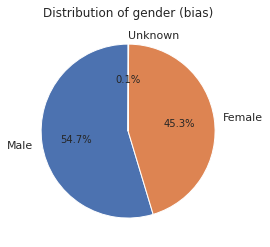

In [13]:
# Create the pie chart
plt.pie(transactions_data['gender'].value_counts(), labels=['Male', 'Female', 'Unknown'], autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of gender (bias)')

# Display the chart
plt.show()

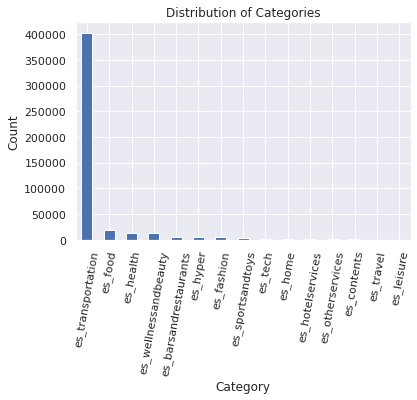

In [14]:
# Count the occurrences of each category
category_counts = transactions_data['category'].value_counts()

# Plot the results as a bar plot
category_counts.plot(kind='bar', )

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=80)

# Show the plot
plt.show()

In [15]:
transactions_data["timestamp"] = pd.to_datetime(
        transactions_data["timestamp"], format="%Y-%m-%d %H:%M:%S UTC"
    )

transactions_data["hour"] = transactions_data.timestamp.dt.hour
transactions_data["day"] = transactions_data.timestamp.dt.day
transactions_data["month"] = transactions_data.timestamp.dt.month
transactions_data["weekday"] = transactions_data.timestamp.dt.weekday
transactions_data["year"] = transactions_data.timestamp.dt.year

Text(0.5, 1.0, 'Count of fraud/not fraud grouped by hour')

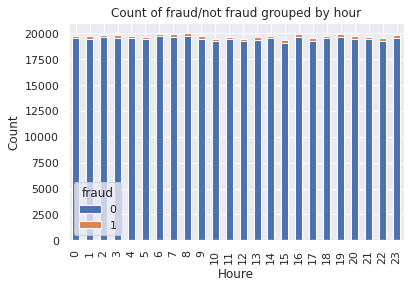

In [17]:
grouped = transactions_data.groupby('hour')['fraud'].value_counts().unstack().fillna(0)
# Plot the results
grouped.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Houre')
plt.ylabel('Count')
plt.title('Count of fraud/not fraud grouped by hour')

Text(0.5, 1.0, 'Count of fraud/not fraud for each day of the week')

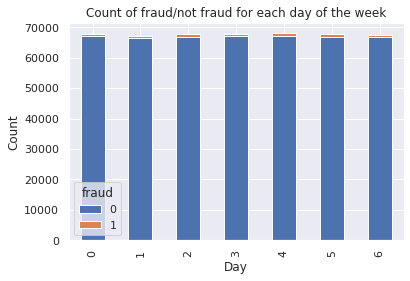

In [21]:
grouped = transactions_data.groupby('weekday')['fraud'].value_counts() \
    .unstack().fillna(0)
# Plot the results
grouped.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of fraud/not fraud for each day of the week')

## Explore the user events dataset

In [14]:
# View a sample of the events dataset
user_events_data.head()

,source,event,timestamp
0,C1974668487,details_change,2020-09-19 15:12:26.321576
1,C1973547259,login,2020-10-12 15:28:25.703053
2,C515668508,login,2020-09-16 10:10:50.498604
3,C1721541488,details_change,2020-10-02 13:59:25.553802
4,C394979408,password_change,2020-10-14 23:27:41.291391


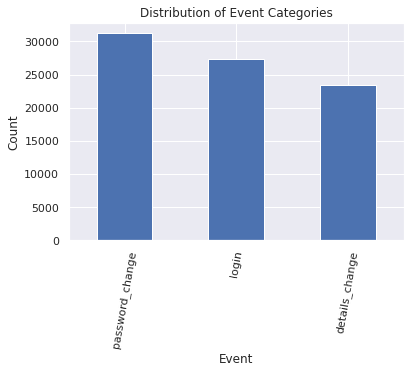

In [23]:
# Count the occurrences of each event category
category_counts = user_events_data['event'].value_counts()

# Plot the results as a bar plot
category_counts.plot(kind='bar', )

# Set labels and title
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Distribution of Event Categories')
plt.xticks(rotation=80)

# Show the plot
plt.show()

## Build and explore the feature vector

In [24]:
# Sorting the two datasets by time
transactions_data = transactions_data.sort_values(by='timestamp', axis=0)
user_events_data = user_events_data.sort_values(by='timestamp', axis=0)

In [28]:
# Merge asof (with time traveling)
all_data  = pd.merge_asof(
    transactions_data,
    user_events_data,
    on='timestamp',
    by='source',
)

# Plot a sample of the interesting columns
all_data.drop(columns=["device", "source", "target"]).sample(5)

,step,age,gender,zipcodeOri,zipMerchant,category,amount,fraud,timestamp,hour,day,month,weekday,year,event
280869,137,2,F,28007,28007,es_transportation,45.29,0,2020-07-14 20:40:18.989269,20,14,7,1,2020,login
270343,27,2,F,28007,28007,es_transportation,9.32,0,2020-07-06 15:04:58.452371,15,6,7,0,2020,password_change
378166,9,3,F,28007,28007,es_transportation,37.31,0,2020-09-27 18:22:31.005277,18,27,9,6,2020,details_change
263804,20,3,F,28007,28007,es_transportation,39.37,0,2020-07-01 14:01:30.419984,14,1,7,2,2020,details_change
283975,106,2,M,28007,28007,es_wellnessandbeauty,40.82,0,2020-07-17 06:45:28.982259,6,17,7,4,2020,password_change


In [30]:
all_data.shape

(473745, 18)

In [29]:
all_data.dtypes

step                    int64
age                     int64
gender                 object
zipcodeOri              int64
zipMerchant             int64
category               object
amount                float64
fraud                   int64
timestamp      datetime64[ns]
source                 object
target                 object
device                 object
hour                    int64
day                     int64
month                   int64
weekday                 int64
year                    int64
event                  object
dtype: object

Now we will start and examine the statistical characteristics of each feature, initial information that can give us different directions in finding outliers, dummies, etc.

In [31]:
all_data.describe()

,step,age,zipcodeOri,zipMerchant,amount,fraud,hour,day,month,weekday,year
count,473745.000000,473745.000000,473745.0,473745.0,473745.000000,473745.000000,473745.000000,473745.000000,473745.000000,473745.000000,473745.000000
mean,77.698114,3.005889,28007.0,28007.0,38.105695,0.012446,11.486950,15.776213,6.495898,3.001053,2019.943778
std,41.991176,1.325787,0.0,0.0,113.887429,0.110863,6.926089,8.820079,3.445879,1.999216,0.230351
min,0.000000,0.000000,28007.0,28007.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2019.000000
25%,42.000000,2.000000,28007.0,28007.0,13.740000,0.000000,5.000000,8.000000,4.000000,1.000000,2020.000000
50%,80.000000,3.000000,28007.0,28007.0,26.890000,0.000000,11.000000,16.000000,7.000000,3.000000,2020.000000
75%,114.000000,4.000000,28007.0,28007.0,42.530000,0.000000,18.000000,23.000000,9.000000,5.000000,2020.000000
max,147.000000,6.000000,28007.0,28007.0,7665.560000,1.000000,23.000000,31.000000,12.000000,6.000000,2020.000000


Another interesting thing is to see the distribution of other tagret to be able select our metrics better.

In [33]:
# Extend categorical features (one hot encoding)
all_data = pd.get_dummies(all_data, columns=['category', 'gender', 'event'])

When we have a dimension of time in the data, a good practice is to look at the distribution of features against our time, of course after breaking down the time into days, hours, months, etc.

Here you can see the distribution of the the fraud vs time.

Correlation Matrix

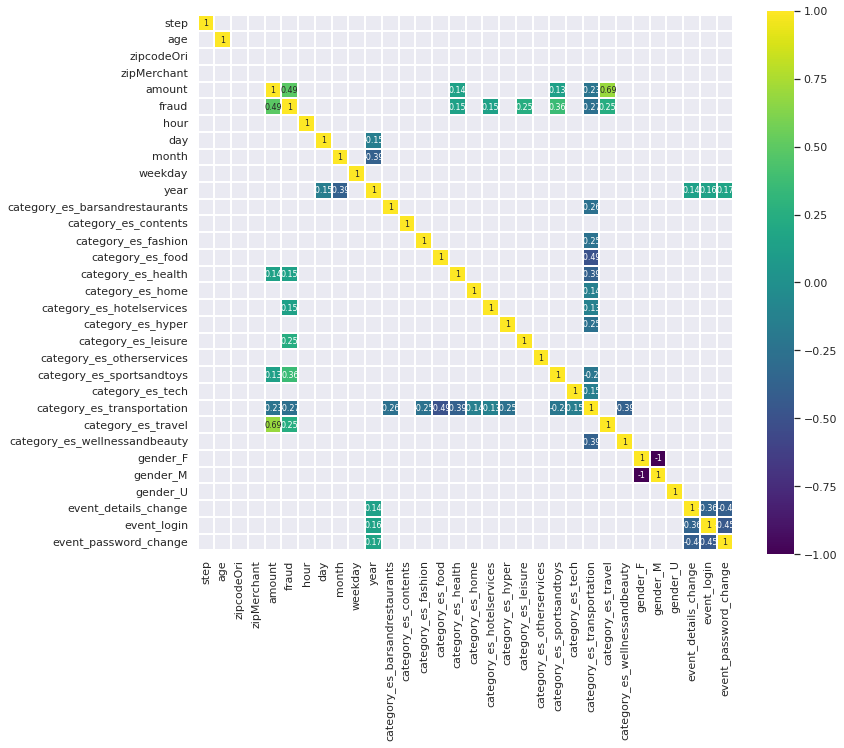

In [34]:
# 
corr = all_data.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Data Analyis with MLRUN

You can see by simply running the describe function from our Market Place you can get a lot of information about the data and perform a qualitative and in-depth analysis on it.

In [37]:
all_data.to_csv('./data_set_describe.csv', index=False)


import mlrun

project = mlrun.get_or_create_project(
    name="fraud-eda", user_project=True, context="./"
)

# import the function
describe = mlrun.import_function('hub://describe')

describe_run = describe.run(params={'label_column': 'fraud',},
                            inputs={"table": './data_set_describe.csv'}, local=True)

> 2023-06-21 10:53:55,169 [info] Loaded project fraud-eda from ./ and saved in MLRun DB
> 2023-06-21 10:53:55,580 [info] Storing function: {'name': 'describe-analyze', 'uid': '3d275b269dc745a18df044e3e3dd8d8c', 'db': 'http://mlrun-api:8080'}
> 2023-06-21 10:54:01,618 [info] The data set is logged to the project under dataset name


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
fraud-eda-admin,...e3dd8d8c,0,Jun 21 10:53:55,completed,describe-analyze,v3io_user=adminkind=owner=adminhost=jupyter-74c86b8866-d2vpm,table,label_column=fraud,,describe-csvhisthistogramsscatter-2dviolinimbalanceimbalance-weights-veccorrelation-matrix-csvcorrelationdataset


> 2023-06-21 10:54:02,013 [info] Run execution finished: {'status': 'completed', 'name': 'describe-analyze'}


#### Few examples for plots we get from mlrun describe function.

In [38]:
# view generated artifacts (charts)
describe_run.outputs

{'describe-csv': 'v3io:///projects/fraud-eda-admin/artifacts/describe-analyze/0/describe-csv.csv',
 'hist': 'store://artifacts/fraud-eda-admin/describe-analyze_hist:3d275b269dc745a18df044e3e3dd8d8c',
 'histograms': 'v3io:///projects/fraud-eda-admin/artifacts/describe-analyze/0/histograms.html',
 'scatter-2d': 'v3io:///projects/fraud-eda-admin/artifacts/describe-analyze/0/scatter-2d.html',
 'violin': 'v3io:///projects/fraud-eda-admin/artifacts/describe-analyze/0/violin.html',
 'imbalance': 'v3io:///projects/fraud-eda-admin/artifacts/describe-analyze/0/imbalance.html',
 'imbalance-weights-vec': 'v3io:///projects/fraud-eda-admin/artifacts/describe-analyze/0/imbalance-weights-vec.csv',
 'correlation-matrix-csv': 'v3io:///projects/fraud-eda-admin/artifacts/describe-analyze/0/correlation-matrix-csv.csv',
 'correlation': 'v3io:///projects/fraud-eda-admin/artifacts/describe-analyze/0/correlation.html',
 'dataset': 'store://artifacts/fraud-eda-admin/dataset:3d275b269dc745a18df044e3e3dd8d8c'}